<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/Activity_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [97]:
# 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

TRAIN = "train/"
TEST = "test/"

DATASET_PATH = "/content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
def load_dataset():
    """Loads the UCI HAR dataset from the specified paths."""
    # Define paths to the data files
    train_x_path = os.path.join(DATASET_PATH, TRAIN, 'X_train.txt')
    train_y_path = os.path.join(DATASET_PATH, TRAIN, 'y_train.txt')
    test_x_path = os.path.join(DATASET_PATH, TEST, 'X_test.txt')
    test_y_path = os.path.join(DATASET_PATH, TEST, 'y_test.txt')

    print(f"Loading training data from: {train_x_path}")
    print(f"Loading training labels from: {train_y_path}")
    print(f"Loading testing data from: {test_x_path}")
    print(f"Loading testing labels from: {test_y_path}")

    # Load data using numpy for efficiency with large numerical datasets
    # These files usually contain space-separated floats or integers
    trainX = np.loadtxt(train_x_path)
    trainy = np.loadtxt(train_y_path)
    testX = np.loadtxt(test_x_path)
    testy = np.loadtxt(test_y_path)

    return trainX, trainy, testX, testy

In [99]:
df = load_dataset()

Loading training data from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt
Loading training labels from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt
Loading testing data from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt
Loading testing labels from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt


In [100]:


# Convert NumPy arrays in the tuple to pandas DataFrames for better visualization
trainX_df = pd.DataFrame(df[0].reshape(-1, df[0].shape[-1]))
trainy_df = pd.DataFrame(df[1])
testX_df = pd.DataFrame(df[2].reshape(-1, df[2].shape[-1]))
testy_df = pd.DataFrame(df[3])

# Define a mapping from numerical labels to activity names
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

print("Training Data (X):")
display(trainX_df.head())

print("\nTraining Labels (y):")
# Map numerical labels to activity names for display
display(trainy_df.head().replace(activity_labels))

print("\nTesting Data (X):")
display(testX_df.head())

print("\nTesting Labels (y):")
# Map numerical labels to activity names for display
display(testy_df.head().replace(activity_labels))

Training Data (X):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892



Training Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING



Testing Data (X):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857



Testing Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [101]:

print("Testing Labels (y) - 실제 값들:")
print("첫 5개 라벨:", df[3][:5])  # 실제 라벨 값
print("라벨별 개수:")
unique, counts = np.unique(df[3], return_counts=True)
for label, count in zip(unique, counts):
    print(f"{label}: {activity_labels[label]} - {count}개")

Testing Labels (y) - 실제 값들:
첫 5개 라벨: [5. 5. 5. 5. 5.]
라벨별 개수:
1.0: WALKING - 496개
2.0: WALKING_UPSTAIRS - 471개
3.0: WALKING_DOWNSTAIRS - 420개
4.0: SITTING - 491개
5.0: STANDING - 532개
6.0: LAYING - 537개


In [102]:
# 실제 라벨 값들 확인
print("Training labels unique values:", np.unique(df[1]))
print("Testing labels unique values:", np.unique(df[3]))
print("Training labels shape:", df[1].shape)
print("Testing labels shape:", df[3].shape)

Training labels unique values: [1. 2. 3. 4. 5. 6.]
Testing labels unique values: [1. 2. 3. 4. 5. 6.]
Training labels shape: (7352,)
Testing labels shape: (2947,)


# 모델 구현

In [103]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# TransformerEncoderLayer 클래스
class TransformerEncoderLayer(layers.Layer):
    def __init__(self, d_model, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(d_model),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)



In [104]:
# Positional Encoding 함수
def get_positional_encoding(seq_len, d_model):
    """위치 인코딩 생성"""
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]

    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    angle_rads = pos * angle_rates

    # 짝수 인덱스에는 sin, 홀수 인덱스에는 cos 적용
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

In [105]:
# 완전히 새로운 TransformerModel 클래스
class MyTransformerModel(tf.keras.Model):
    def __init__(self, seq_len, input_dim, d_model, num_heads, ff_dim, num_layers, num_classes, dropout_rate=0.1):
        super(MyTransformerModel, self).__init__()

        self.d_model = d_model
        self.seq_len = seq_len

        # Input projection layer (입력 차원을 d_model로 변환)
        self.input_projection = layers.Dense(d_model)

        # Positional encoding
        self.pos_encoding = get_positional_encoding(seq_len, d_model)

        # Transformer encoder layers
        self.encoder_layers = [
            TransformerEncoderLayer(d_model, num_heads, ff_dim, dropout_rate)
            for _ in range(num_layers)
        ]

        self.dropout = layers.Dropout(dropout_rate)

        # Classification head
        self.global_avg_pool = layers.GlobalAveragePooling1D()
        self.classifier = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs, training=None):
        seq_len = tf.shape(inputs)[1]

        # Input projection
        x = self.input_projection(inputs)  # (batch_size, seq_len, d_model)

        # Add positional encoding
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        # Pass through transformer encoder layers
        for encoder_layer in self.encoder_layers:
            x = encoder_layer(x, training=training)

        # Global average pooling and classification
        x = self.global_avg_pool(x)  # (batch_size, d_model)
        outputs = self.classifier(x)  # (batch_size, num_classes)

        return outputs


In [106]:

# 새로운 모델 생성 함수
def create_my_transformer_model(input_shape, num_classes, d_model=64, num_heads=4,
                              ff_dim=128, num_layers=2, dropout_rate=0.1):
    """
    Transformer 모델 생성
    """
    seq_len, input_dim = input_shape

    model = MyTransformerModel(
        seq_len=seq_len,
        input_dim=input_dim,
        d_model=d_model,
        num_heads=num_heads,
        ff_dim=ff_dim,
        num_layers=num_layers,
        num_classes=num_classes,
        dropout_rate=dropout_rate
    )

    # 모델 빌드를 위해 더미 입력으로 호출
    dummy_input = tf.random.normal((1, seq_len, input_dim))
    _ = model(dummy_input)

    return model

print("모든 클래스와 함수가 새로 정의되었습니다!")

# 모델 생성
transformer_model = create_my_transformer_model(
    input_shape=input_shape,
    num_classes=num_classes,
    d_model=64,
    num_heads=4,
    ff_dim=128,
    num_layers=2,
    dropout_rate=0.1
)

# 모델 컴파일
from tensorflow.keras.optimizers import Adam
transformer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel summary:")
transformer_model.summary()

모든 클래스와 함수가 새로 정의되었습니다!

Model summary:


Model: "my_transformer_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (1, 33, 64)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_layer_4     │ ?                      │        83,200 │
│ (TransformerEncoderLayer)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_layer_5     │ ?                      │        83,200 │
│ (TransformerEncoderLayer)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_8      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (1, 6)                 │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,942 (656.02 KB)

 Trainable params: 167,942 (656.02 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

# 학습 설정
epochs = 50
batch_size = 64  # 배치 크기
validation_split = 0.2

# 콜백 설정
callbacks = [
    # 검증 손실이 개선되지 않으면 조기 종료
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),

    # 검증 손실이 plateau에 도달하면 학습률 감소
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.0001,
        verbose=1
    )

]

# 모델 학습
history = transformer_model.fit(
    X_train_reshaped,
    y_train - 1,  # 라벨을 0-5로 변환 (원래 1-6)
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    callbacks=callbacks,
    verbose=1  # 에포크별 진행 상황 출력
)

print("\n학습 완료!")

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 192ms/step - accuracy: 0.3525 - loss: 1.3913 - val_accuracy: 0.6404 - val_loss: 0.6611 - learning_rate: 0.0010
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.6091 - loss: 0.7214 - val_accuracy: 0.8185 - val_loss: 0.4311 - learning_rate: 0.0010
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.7933 - loss: 0.4769 - val_accuracy: 0.8294 - val_loss: 0.3620 - learning_rate: 0.0010
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.8460 - loss: 0.3758 - val_accuracy: 0.9055 - val_loss: 0.2397 - learning_rate: 0.0010
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - accuracy: 0.8941 - loss: 0.2542 - val_accuracy: 0.9075 - val_loss: 0.2524 - learning_rate: 0.0010
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.9177 - loss: 0.2078 - val_accuracy: 0.9171 - val_loss: 0.1968 - learning_rate: 0.0010
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9220 - loss: 0.


Plotting training history...


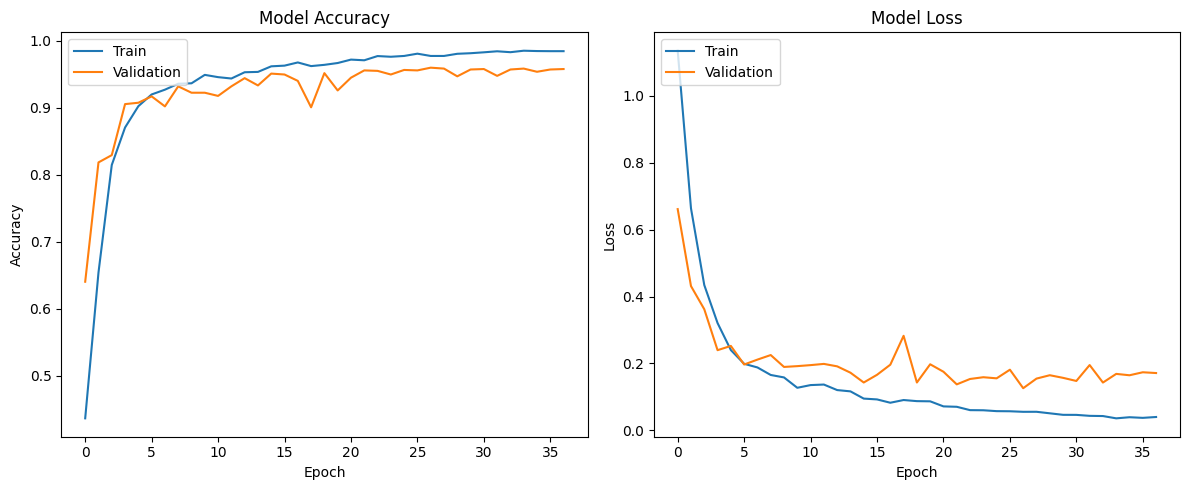

Plotting complete.


In [110]:
print("\nPlotting training history...")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

print("Plotting complete.")

In [113]:
print("="*50)
print("           테스트 결과")
print("="*50)
print(f"테스트 데이터 정확도 (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"테스트 데이터 손실 (Loss): {loss:.4f}")
print("="*50)

           테스트 결과
테스트 데이터 정확도 (Accuracy): 0.9325 (93.25%)
테스트 데이터 손실 (Loss): 0.2348


In [117]:
# 테스트 데이터 평가
loss, accuracy = transformer_model.evaluate(
    X_test_reshaped,
    y_test - 1,  # 라벨을 0-5로 변환 (학습할 때와 동일하게)
    verbose=0
)

# 예측 결과도 확인해보기
predictions = transformer_model.predict(X_test_reshaped, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test - 1  # 0-5로 변환

# 클래스별 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix

print("\n클래스별 상세 결과:")
print("="*50)

# 라벨 이름 정의
class_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

print(classification_report(true_classes, predicted_classes, target_names=class_names))



클래스별 상세 결과:
                    precision    recall  f1-score   support

           WALKING       0.96      0.92      0.94       496
  WALKING_UPSTAIRS       0.94      0.90      0.92       471
WALKING_DOWNSTAIRS       0.87      0.95      0.91       420
           SITTING       0.90      0.90      0.90       491
          STANDING       0.92      0.91      0.92       532
            LAYING       0.99      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



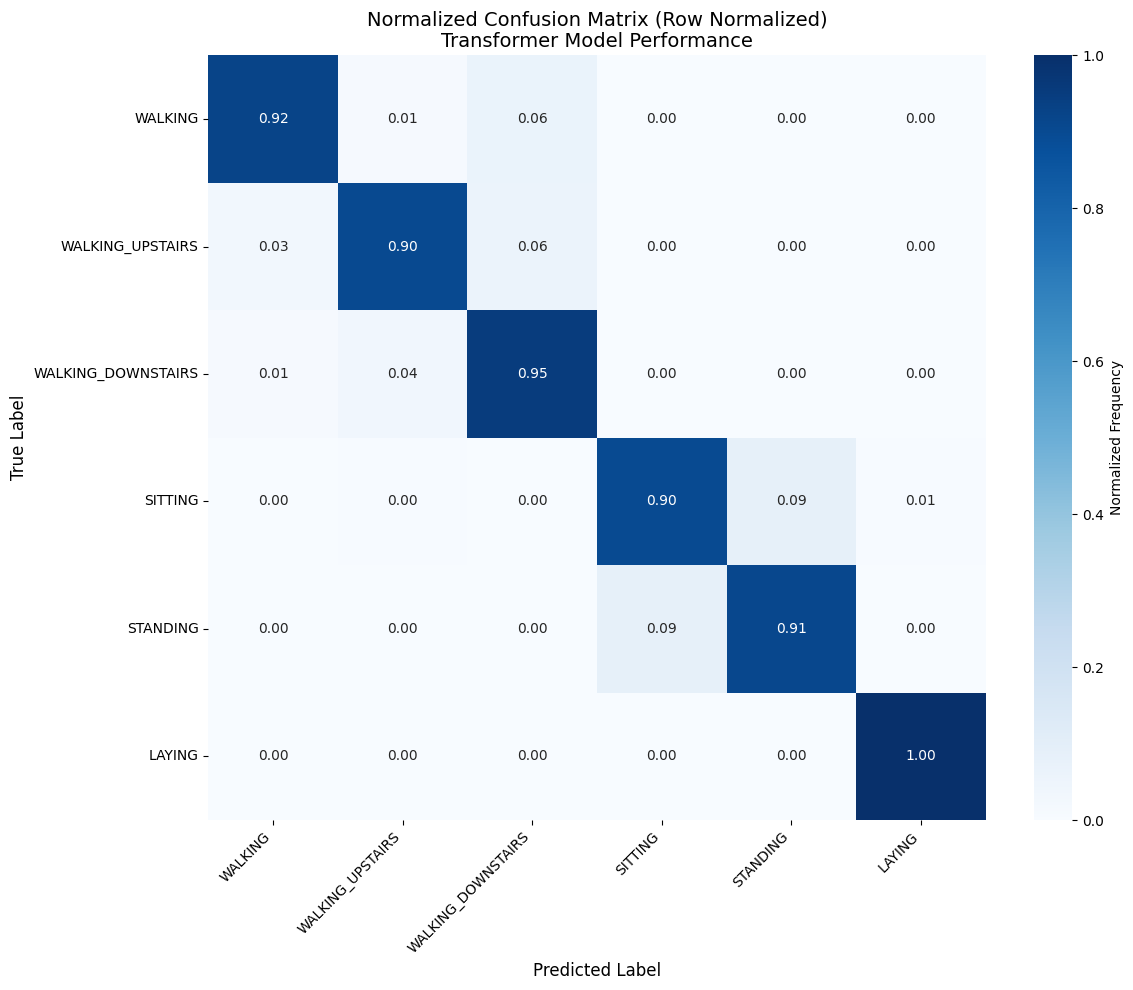

In [118]:
# 라벨 정의
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# 혼동 행렬 계산 (이미 위에서 계산했지만 다시 정의)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# 혼동 행렬 정규화 (각 행의 합으로 나누어 비율로 변환)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# 정규화된 혼동 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(
    conf_matrix_normalized,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=LABELS,
    yticklabels=LABELS,
    cbar_kws={'label': 'Normalized Frequency'}
)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Normalized Confusion Matrix (Row Normalized)\nTransformer Model Performance', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()